# Dataset 2: World Happiness

This dataset stores the  happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for 2019 and use the Gallup weights to make the estimates representative.

[Source](https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv)

## 1. Initial Exploration of the Dataset

### 1.1 Loading the dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/world_happiness.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### 1.1.1 What I Notice
- I checked the column names to set expectations for the kind of info I’ll be analyzing.  
- Took a quick look at the values stored in each column.  
- A few questions naturally come up when trying to understand why the data looks the way it does:  
  - What exactly is the Ladder Score and how is it measured?  
  - What do we mean by "social support"?  
  - Why is healthy life expectancy shown in decimal values?  
  - How are things like freedom and generosity measured in this dataset?  
  - What does "perceptions of corruption" really capture?  
  



## 1.2 Dataset structure: Inspection methods

In [20]:
# Checking basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### 1.2.1 What `df.info()` Uncovers
- The dataset has **156 rows × 9 columns**.  
- Mix of both decimal and integer values.  
- No missing values: All 156 rows are complete.  
- Further checks may be needed to spot any unexpected values in specific columns and decide on a handling strategy.  
- Column names are already user‑friendly, so no renaming needed at this stage.  
- The only string (object type) column is the `country or region`.  

#### 1.2.2 Impact on Dataset Choice
- Completeness is a plus: No nulls across the dataset.  
- Requires good context understanding to interpret results and tell a meaningful story.  
- Data reflects **2019 only**, so insights may feel outdated if the goal is current conclusions.  
- Overall, it’s a solid dataset to work with, as long as the analysis scope is kept focused.  

## 1.3 Summary Statistics

Describing the dataset statistical values using two different `describe()` methods.

In [21]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [22]:
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols].describe()


,Country or region
count,156
unique,156
top,Finland
freq,1


#### 1.3.1 Interpreting `df.describe()` results
- **Overall rank**
    - This column describes the rank of each country in terms of happiness (minimum 1, maximum 156, corresponding to the total number of countries). 
    - This information may be redundant considering the ranking comes directly from ordering countries by their score. 
    - I will need to verify that this column corresponds exactly to the score ranking and may drop it if it adds no additional value.
    - Despite potential redundancy, the rank representation remains relevant.

- **Score**
    - The score appears to have a roughly symmetric distribution, as evidenced by the mean (5.41) and median (5.38) being nearly identical, and the relatively even spread of data between the first quartile (4.54) and third quartile (6.18).
    - The "happiest" country has a score of 7.77, while the least happy scores 2.85, establishing the full outcome range for this analysis.
    - The standard deviation of 1.11 indicates moderate variability in happiness scores across countries. Nothing unexpected.

- **GDP per capita**
    - GDP per capita shows substantial variation with a mean of 0.91 and standard deviation of 0.40, suggesting economic differences are a significant dimension across countries.
    - The minimum value of 0.00 indicates at least one country has the lowest possible GDP contribution (possibly representing Dystopia as the fictional country with the worst situation possible as a reference).
    - The median (0.96) is slightly higher than the mean, indicating a mild left skew—a few countries with very low GDP pull the mean down slightly.
    -  The maximum value of 1.68 represents the highest economic contribution to happiness, likely from the wealthiest nations.

- **Social support**
    - Social support demonstrates high values overall, with a mean of 1.21 and median of 1.27, suggesting most countries provide relatively strong social support systems.
    - The standard deviation of 0.30 is relatively small compared to the mean, indicating less variation in social support across countries compared to GDP.
    - The minimum of 0.00 and maximum of 1.62 show the full range from countries with minimal to maximal social support contributions.


- **Healthy life expectancy**

    - Healthy life expectancy has a mean of 0.73 and median of 0.79, with the median being higher, suggesting a left-skewed distribution where a there are countries that show a short life expectancy and bring the median down.
    - The standard deviation of 0.24 indicates moderate variability in health outcomes across countries.
    -   The third quartile at 0.88 shows that 75% of countries have healthy life expectancy contributions below this value.

- **Freedom to make life choices**

    - Freedom shows a mean of 0.39 and median of 0.42, indicating a symmetric distribution with moderate levels of perceived freedom globally.
    - The standard deviation of 0.14 is relatively small, suggesting freedom contributions are more consistent across countries than economic factors.
    - The range from 0.00 to 0.63 indicates that even the country with the highest freedom contribution is still relatively constrained compared to theoretical maximum values.
    - The relatively tight interquartile range (0.31 to 0.51) suggests most countries cluster around similar levels of freedom.

- **Generosity**

    - Generosity has the lowest mean (0.18) and smallest standard deviation (0.10) of all factors, indicating it contributes least to happiness scores and varies minimally across countries.
    - The median of 0.18 equals the mean, suggesting a symmetric distribution.
    - The range from 0.00 to 0.57 shows that even the most generous countries contribute relatively little to the overall happiness score through this factor alone.
    - Considering the obtained values, this column seems to be the less important contributor to the score.

- **Perceptions of corruption**

    - Perceptions of corruption (or more precisely, absence of corruption, since higher values indicate less corruption) has a mean of 0.11 and median of 0.09, indicating generally low contributions to happiness from this factor.
    - The standard deviation of 0.09 is relatively large compared to the mean, suggesting high variability—some countries benefit substantially from low corruption while others are heavily penalized.
    - The maximum value of 0.45 indicates that low corruption can make a meaningful positive contribution in the best-performing countries.
    - The minimum of 0.00 suggests some countries experience severe corruption that contributes nothing positive to their happiness scores. Very similar to the distopic standards.

- **Categorical Column: Country or Region**
    - This columns has unique values, so, not a mode or tendency to uncover here! 


## 1.4 Missing Values


In [23]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

#### 1.4.1 Interpreting missing values
Based on `df.info()`, every column has 156 non-null entries, so this particular version of the dataset does not contain any explicit missing values.  
Other versions of the World Happiness data sometimes report a small percentage of missing entries, but that does not apply here, so my main data-quality concerns will be outliers, scaling, and interpretation of the variables.

#### 1.4.2 Impact on dataset choice
Since there are no missing values to worry about, this dataset is even more attractive for analysis: I can jump straight into exploration and modeling without investing time in imputation or row/column removal.  
Talking about completeness, the dataset is a solid option for further analysis.


## 1.5 Check for Duplicate Rows

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df[df.duplicated(keep = False)].sort_values(list(df.columns))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


#### 1.5.1 Interpreting duplicates
- As I expected, I don't have any duplicated row for this dataset, therefore this is not going to be a big concern.

## 1.6 Simple Visual Exploration of Key Columns

Based on my findings when analyzing the describe() methods outputs, there are some columns I would like to take a look into for both numerical and categorical types. I'm going to use the `hist()` method for this purpose, as well as bar charts that represent the distribution of categorical features.

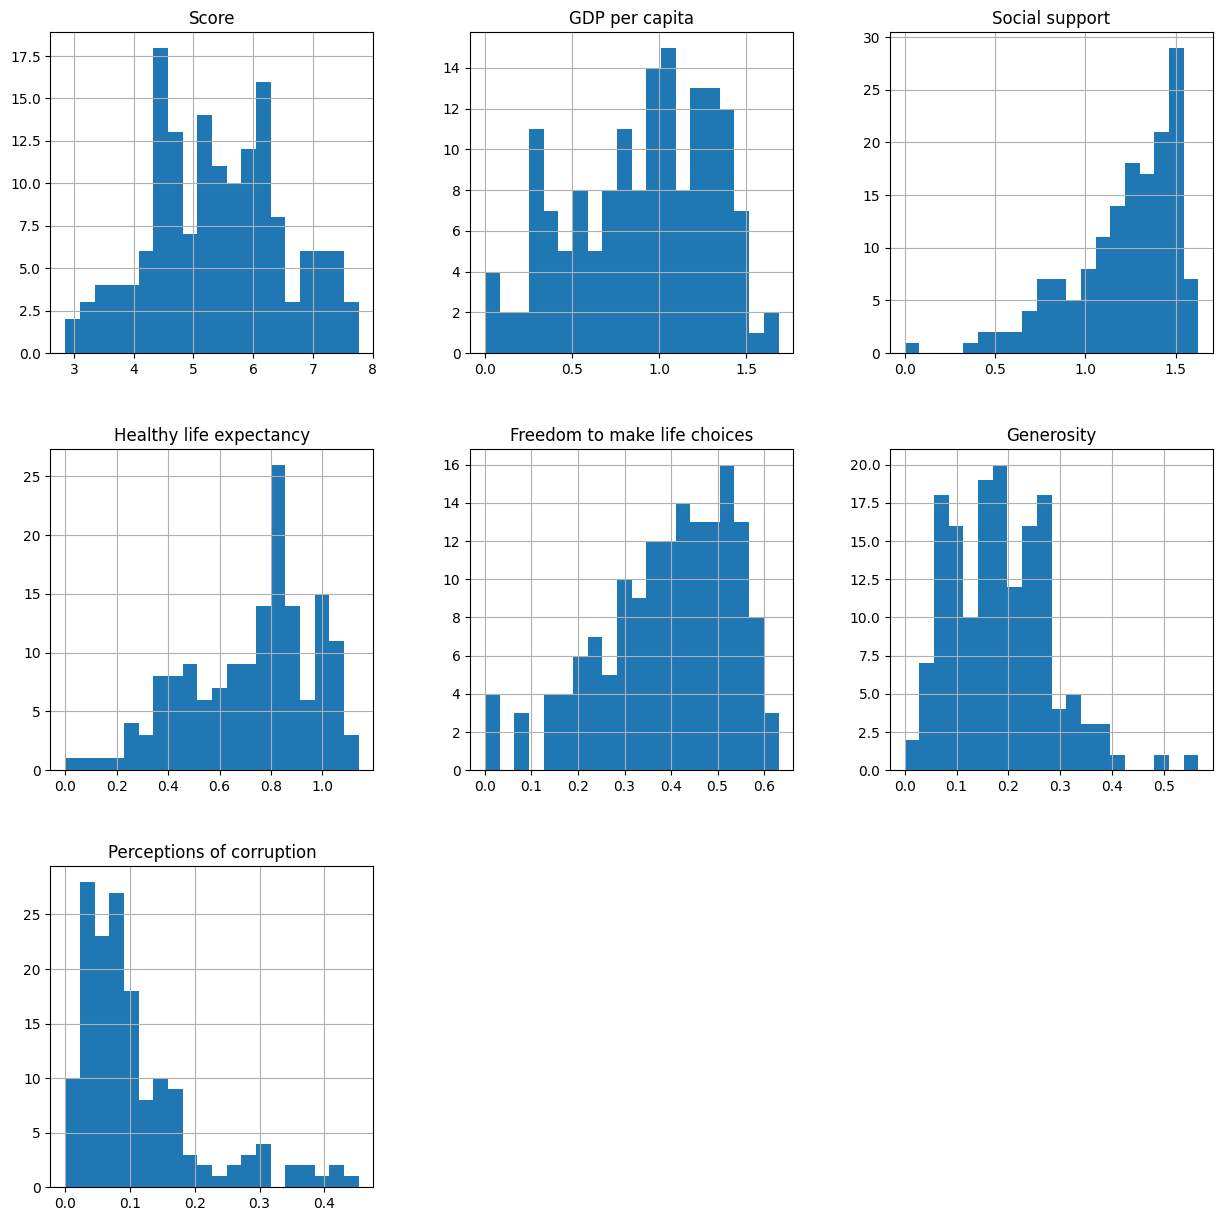

In [26]:
# Not taking Overall rank into account for this as discussed previously
df.drop(columns='Overall rank').hist(bins=20,figsize=(15,15))
plt.show()

#### 1.6.1 Interpreting Numerical Column Distributions
I confirmed several assumptions made when analyzing each column’s statistical descriptions, such as:

- The `Score` column clusters around the middle of the 0–10 scale, so most countries are “somewhat happy” rather than extremely happy or unhappy. It does show a normal-like distribution.
- GDP per capita shows high a high class variance, which makes sense considering how different countries are in terms of GDP.
- Social support is high for most countries, suggesting that having people to rely on is a very common strength in this sample, and contributes a lot to the happiness score.
- Freedom to make life choices is decent for many countries but with a noticeable group where people feel they have much less freedom.
- Generosity stays relatively low almost everywhere, so it tends to add only a small impact to happiness compared with the other factors.
- Perceptions of corruption are heavily skewed toward “corrupt,” implying that many countries struggle with trust in institutions and only a minority are clearly seen as clean. **Note:** It is important to remember that in this column the lower the value

## 1.7 Categorical Variables: Quick Counts

In [27]:
df['Country or region'].value_counts()

Country or region
Finland                     1
Denmark                     1
Norway                      1
Iceland                     1
Netherlands                 1
                           ..
Rwanda                      1
Tanzania                    1
Afghanistan                 1
Central African Republic    1
South Sudan                 1
Name: count, Length: 156, dtype: int64

#### 1.7.1 Interpreting Categorical Column Count Plots
- The previous code worked as proof of my previous analysis. Every country or region name is unique in this dataset!

## 1.8 Initial Questions Section: Early Thoughts on Possible Analysis Directions
- **Score varies around the world:** Which countries and regions are  near the top or bottom, and how wide is the gap between “average” and “happiest” places.
- It is also interesting to ask how much GDP per capita really affects happiness. Do richer countries always score higher?, or are there clear examples where money stops making a noticeable difference.
- With healthy life expectancy generally in the mid–high range, a key question is whether marginal improvements in health still show up in happiness scores, or if there is a plateau once basic health needs are met.
- Do countries where people have more `freedom` systematically report higher happiness, even after considering income and health?.
- Given the distrubution analysis of `generosity`, it might be interesting to look for “outlier” countries where generosity is unusually high and see whether they also overperform on overall happiness.
- Taking into account the corruption perception column, do countries with low corruption get an extra happiness advantage compared to equally wealthy but more corrupt countries?
- Because all post‑score columns are model-based contributions, a larger, more technical question is how stable these contributions are across years or versions of the report. Do the same factors keep showing up as the strongest drivers of happiness, or does their relative importance shift over time?

## 1.9 Final Evaluation
### 1.9.1 Data Quality
- The dataset is fully complete: all 9 columns have 156 non‑null entries, so there is no missing‑data work to do.
- Each country appears only once, and the columns are correctly typed (`Score` and all factors are numeric, `Country or region` is text), which keeps basic cleaning needs low.

### 1.9.2 Appropriateness for Analysis
- The structure is simple and tidy: one row per country plus a small set of well-defined numeric variables, which is great for visualization and cross‑country comparisons.
- Because the post‑score columns represent how much each factor contributes to happiness, the data is especially well suited for questions about *which* factors seem to matter most and how that pattern changes across countries and regions, rather than for predicting `Score` itself from these same contributions. This doesn't mean the dataset is not suitable of analysis in general, but, the information it provides is not related to the kind of analysis that is expected from this project (the dataset would be helpful for developing new regression ML models, and may have worked well previously in this matter).

### 1.9.3 Overall Decision
Would I choose this dataset for further analysis?  
**No, I wouldn't.**

**Reasons**

After investigating how these values are constructed, the conclusion is that every column after the happiness Score is a model‑based estimate of how many ladder points each factor contributes to a country’s overall happiness score. This means the dataset already encodes the estimated impact of each feature on the outcome, rather than providing the original raw indicators. As a result, the analysis will primarily focus on comparing and interpreting these contributions across countries, rather than treating the dataset as purely “raw” country information. Since I was hoping to do this kind of analysis, this dataset won't be considered.